In [0]:
%tensorflow_version 2.x
import tensorflow as tf # WELL
import numpy as np # data manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualisation

from sklearn.datasets import load_breast_cancer # dataset
from sklearn.model_selection import train_test_split # to split the data into training and test sets
from sklearn.preprocessing import StandardScaler # Normalization

TensorFlow 2.x selected.


In [0]:
# load the data
dataset = load_breast_cancer()

In [0]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
X = dataset.data
Y = dataset.target

# Process the Data

In [0]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size = .3)
N, D = X_train.shape # Getting shapes to pass it automatically to Dense layer

In [0]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Creating the model

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 - 1s - loss: 0.5725 - accuracy: 0.7186 - val_loss: 0.5954 - val_accuracy: 0.6901
Epoch 2/100
398/398 - 0s - loss: 0.5084 - accuracy: 0.7789 - val_loss: 0.5391 - val_accuracy: 0.7544
Epoch 3/100
398/398 - 0s - loss: 0.4537 - accuracy: 0.7990 - val_loss: 0.4923 - val_accuracy: 0.7836
Epoch 4/100
398/398 - 0s - loss: 0.4098 - accuracy: 0.8442 - val_loss: 0.4528 - val_accuracy: 0.8070
Epoch 5/100
398/398 - 0s - loss: 0.3726 - accuracy: 0.8693 - val_loss: 0.4204 - val_accuracy: 0.8070
Epoch 6/100
398/398 - 0s - loss: 0.3426 - accuracy: 0.8744 - val_loss: 0.3944 - val_accuracy: 0.8304
Epoch 7/100
398/398 - 0s - loss: 0.3180 - accuracy: 0.8920 - val_loss: 0.3721 - val_accuracy: 0.8480
Epoch 8/100
398/398 - 0s - loss: 0.2976 - accuracy: 0.8920 - val_loss: 0.3529 - val_accuracy: 0.8772
Epoch 9/100
398/398 - 0s - loss: 0.2795 - accuracy: 0.9045 - val_loss: 0.3366 - val_accuracy: 0.8889
Epoch 10/100
398/398 - 0s - loss: 0.2642 - ac

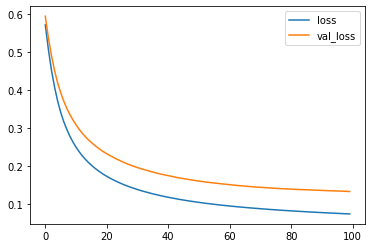

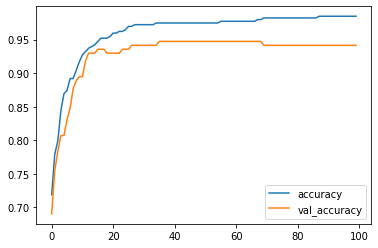

In [0]:


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = (D,), activation = 'sigmoid')) # We'll use sigmoid activation function because the problem is classification problem

# Compile the model with adam algorithm as optimizer, binary cross entropy as loss function and accuracy as metric
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

# Now we can fit the model and plot the results
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, verbose = 2)

print('Evaluated Train Set Score:', model.evaluate(X_train, y_train))
print('Evaluated Test Set Score:', model.evaluate(X_test, y_test))

# Plot the loss and accuracy
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

# Making predictions

In [0]:

P = model.predict(X_test).reshape(1,-1)
print(P) # Output sigmoid function 

[[8.62089992e-01 7.49515444e-02 1.85885769e-03 8.54102969e-01
  8.07186663e-01 9.18148339e-01 9.68095541e-01 9.60402071e-01
  9.98612523e-01 1.72766752e-03 9.01064426e-02 3.33018019e-03
  7.33736455e-01 5.91291428e-01 9.81442750e-01 8.77513587e-01
  6.09693643e-06 9.99656677e-01 9.93997335e-01 8.80688012e-01
  9.87093151e-01 9.99945879e-01 9.99643445e-01 9.38112974e-01
  1.12254784e-01 5.21311304e-03 9.98928487e-01 9.98661280e-01
  3.03219981e-03 9.59274475e-05 8.46425100e-05 1.20234711e-03
  9.87927377e-01 9.88624334e-01 9.92167413e-01 9.99471962e-01
  9.93019998e-01 1.82346266e-03 5.54966391e-04 8.52764904e-01
  1.44385768e-03 9.50550079e-01 2.75555387e-04 9.68910009e-02
  9.99823391e-01 9.23733115e-02 9.89585936e-01 5.24385683e-02
  1.17881685e-01 9.93406057e-01 5.40228887e-03 9.95207250e-01
  9.99585450e-01 9.99464452e-01 5.03797841e-04 9.85825837e-01
  1.79347377e-02 9.01126087e-01 4.38093156e-01 3.95638775e-03
  4.64508653e-01 9.97019291e-01 9.96432066e-01 9.96621490e-01
  7.5312

In [0]:
# To make the classification we should round these values
P = np.round(P)
P

array([[1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
        1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
        0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
        0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
        1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.]], dtype=float32)

In [0]:
# Let's look at the accuracy of predictions
print('Manually calculated accuracy:', np.mean(P == y_test))
print('Evaluated loss and accuracy by tensorflow:', model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9766081871345029
171/171 [==============================] - 0s 78us/sample - loss: 0.1145 - accuracy: 0.9766
Evaluated loss and accuracy by tensorflow: [0.11448954786473547, 0.9766082]


# Saving and loading the model


In [0]:

model.save('breast_cancer_classification.h5')

In [0]:
# Check that the model file exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Feb 20 09:00 breast_cancer_classification.h5
drwxr-xr-x 1 root root 4.0K Feb  5 18:37 sample_data


In [0]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you 
# DON'T use the Input() layer explicitly
# So, make sure you define the model's input shape with ONLY Dense layer
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('breast_cancer_classification.h5')
print(model.layers)
model.evaluate(X_test, y_test)

171/171 [==============================] - 0s 447us/sample - loss: 0.1145 - accuracy: 0.9766


[0.11448954786473547, 0.9766082]